<a href="https://colab.research.google.com/github/Mahesh-ch06/2024-STATML_Assignments/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-by-Step Structure

# Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample

# Load and Preprocess the Train Dataset

In [2]:
data=pd.read_csv('/content/train_dataframes.csv')

In [3]:
data

datetime   week_X-2   week_X-3   week_X-4       MA_X-4  \
0      2015-01-31 01:00:00   962.2865   906.9580   970.3450   938.004850   
1      2015-01-31 02:00:00   933.3221   863.5135   912.1755   900.284075   
2      2015-01-31 03:00:00   903.9817   848.4447   900.2688   881.704325   
3      2015-01-31 04:00:00   900.9995   839.8821   889.9538   876.458825   
4      2015-01-31 05:00:00   904.3481   847.1073   893.6865   879.190775   
...                    ...        ...        ...        ...          ...   
36715  2019-04-09 20:00:00  1362.1477  1376.6220  1335.4711  1360.112475   
36716  2019-04-09 21:00:00  1330.7467  1338.3879  1305.3631  1332.959900   
36717  2019-04-09 22:00:00  1275.5550  1281.6932  1240.1208  1279.486450   
36718  2019-04-09 23:00:00  1200.3537  1209.2950  1165.0237  1199.699525   
36719  2019-04-10 00:00:00  1141.5161  1149.9883  1099.2100  1130.238133   

       dayOfWeek  weekend  holiday  Holiday_ID  hourOfDay    T2M_toc  \
0              1        1        0           0          1  25.308496   
1              1        1        0           0          2  25.141443   
2              1        1        0           0          3  25.006738   
3              1        1        0           0          4  24.899713   
4              1        1        0           0          5  24.821558   
...          ...      ...      ...         ...        ...        ...   
36715          4        0        0           0         20  29.044763   
36716          4        0        0           0         21  28.539545   
36717          4        0        0           0         22  28.163232   
36718          4        0        0           0         23  27.830194   
36719          5        0        0           0          0  27.522791   

          DEMAND  
0       954.2018  
1       913.8660  
2       903.3637  
3       889.0806  
4       910.1472  
...          ...  
36715  1397.5788  
36716  1350.5093  
36717  1308.7955  
36718  1232.4521  
36719  1155.5925  

[36720 rows x 12 columns]

## Analyzing Data using Various methods

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    36720 non-null  object 
 1   week_X-2    36720 non-null  float64
 2   week_X-3    36720 non-null  float64
 3   week_X-4    36720 non-null  float64
 4   MA_X-4      36720 non-null  float64
 5   dayOfWeek   36720 non-null  int64  
 6   weekend     36720 non-null  int64  
 7   holiday     36720 non-null  int64  
 8   Holiday_ID  36720 non-null  int64  
 9   hourOfDay   36720 non-null  int64  
 10  T2M_toc     36720 non-null  float64
 11  DEMAND      36720 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 3.4+ MB


## Identifying and Handling Missing Data

In [5]:
if data.isnull().values.any():
    print("\nMissing values found. Filling with column means...")
    data = data.fillna(data.mean())
else:
    print(data.isna().sum())
    print("\nNo missing values found.")

datetime      0
week_X-2      0
week_X-3      0
week_X-4      0
MA_X-4        0
dayOfWeek     0
weekend       0
holiday       0
Holiday_ID    0
hourOfDay     0
T2M_toc       0
DEMAND        0
dtype: int64

No missing values found.


## column-wise analysis

In [6]:
j=0
for i in data.columns:
  j+=1
  print(f"{j}. {i}\n\n{data[i].describe()}")
  print("-"*50)

1. datetime

count                   36720
unique                  36720
top       2015-01-31 01:00:00
freq                        1
Name: datetime, dtype: object
--------------------------------------------------
2. week_X-2

count    36720.000000
mean      1172.405388
std        191.916845
min         85.192500
25%       1004.807450
50%       1160.983850
75%       1318.602650
max       1719.043900
Name: week_X-2, dtype: float64
--------------------------------------------------
3. week_X-3

count    36720.000000
mean      1171.627655
std        191.649220
min         85.192500
25%       1004.093150
50%       1160.245150
75%       1317.705275
max       1645.477300
Name: week_X-3, dtype: float64
--------------------------------------------------
4. week_X-4

count    36720.000000
mean      1170.818351
std        191.535919
min         85.192500
25%       1003.349825
50%       1158.946650
75%       1316.997800
max       1645.477300
Name: week_X-4, dtype: float64
------------------------

In [8]:
j=0
for i in data.columns:
    j+=1
    print(f"{j}. {i}\n")
    print(f"the set of value in \"{i}\" are {sorted(set(data[i]))}")
    print(f"range({i}): {data[i].min()} - {data[i].max()}\n")
    print(f"the length of set of unique value in {i} is {len(set(data[i]))}\n")
    print("frequency:\n")
    print(data[i].value_counts(),"\n")
    print("data discription\n",data[i].describe(),"\n","-"*100)


1. datetime

the set of value in "datetime" are ['2015-01-31 01:00:00', '2015-01-31 02:00:00', '2015-01-31 03:00:00', '2015-01-31 04:00:00', '2015-01-31 05:00:00', '2015-01-31 06:00:00', '2015-01-31 07:00:00', '2015-01-31 08:00:00', '2015-01-31 09:00:00', '2015-01-31 10:00:00', '2015-01-31 11:00:00', '2015-01-31 12:00:00', '2015-01-31 13:00:00', '2015-01-31 14:00:00', '2015-01-31 15:00:00', '2015-01-31 16:00:00', '2015-01-31 17:00:00', '2015-01-31 18:00:00', '2015-01-31 19:00:00', '2015-01-31 20:00:00', '2015-01-31 21:00:00', '2015-01-31 22:00:00', '2015-01-31 23:00:00', '2015-02-01 00:00:00', '2015-02-01 01:00:00', '2015-02-01 02:00:00', '2015-02-01 03:00:00', '2015-02-01 04:00:00', '2015-02-01 05:00:00', '2015-02-01 06:00:00', '2015-02-01 07:00:00', '2015-02-01 08:00:00', '2015-02-01 09:00:00', '2015-02-01 10:00:00', '2015-02-01 11:00:00', '2015-02-01 12:00:00', '2015-02-01 13:00:00', '2015-02-01 14:00:00', '2015-02-01 15:00:00', '2015-02-01 16:00:00', '2015-02-01 17:00:00', '2015-02

### **Purpose**

*This type of analysis is helpful for:*

**Exploratory Data Analysis (EDA):**
 Understanding the characteristics and distribution of each column.

**Data Cleaning:** Identifying inconsistencies, outliers, or missing values in the dataset.

**Feature Engineering:** Gaining insight into categorical data or numeric ranges to decide how to preprocess or transform the data.

## encoding categorical data

In [9]:
label_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = label_encoder.fit_transform(data[i])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    36720 non-null  int64  
 1   week_X-2    36720 non-null  float64
 2   week_X-3    36720 non-null  float64
 3   week_X-4    36720 non-null  float64
 4   MA_X-4      36720 non-null  float64
 5   dayOfWeek   36720 non-null  int64  
 6   weekend     36720 non-null  int64  
 7   holiday     36720 non-null  int64  
 8   Holiday_ID  36720 non-null  int64  
 9   hourOfDay   36720 non-null  int64  
 10  T2M_toc     36720 non-null  float64
 11  DEMAND      36720 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 3.4 MB


### **Purpose**

This is a data preprocessing step used to prepare categorical variables for machine learning models. Most models cannot work directly with text or non-numeric data, so encoding is necessary.

# Feature

In [11]:
y=data['DEMAND']
x=data.drop('DEMAND',axis=1)

## target variable (y)

In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36720 entries, 0 to 36719
Series name: DEMAND
Non-Null Count  Dtype  
--------------  -----  
36720 non-null  float64
dtypes: float64(1)
memory usage: 287.0 KB


### Statistical Distribution

In [13]:
y.describe()

count    36720.000000
mean      1174.246264
std        192.028058
min         85.192500
25%       1006.470375
50%       1162.468800
75%       1320.387025
max       1719.043900
Name: DEMAND, dtype: float64

In [14]:
y.value_counts()

DEMAND
1096.4417    2
1044.1433    2
995.3267     2
1497.0936    2
1177.6124    2
            ..
1157.6844    1
1150.2957    1
1229.2373    1
1289.7418    1
1155.5925    1
Name: count, Length: 36621, dtype: int64

### Kernel Density Estimation (KDE) plot

In [15]:
sns.kdeplot(y, fill=True, color='blue')
plt.title('Density of Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

### Frequency distribution of categorical

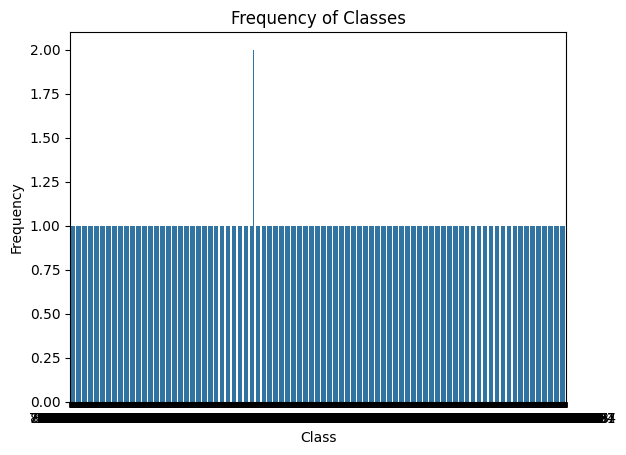

In [16]:
sns.countplot(x=y)
plt.title('Frequency of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

##  features (x)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36720 entries, 0 to 36719
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    36720 non-null  int64  
 1   week_X-2    36720 non-null  float64
 2   week_X-3    36720 non-null  float64
 3   week_X-4    36720 non-null  float64
 4   MA_X-4      36720 non-null  float64
 5   dayOfWeek   36720 non-null  int64  
 6   weekend     36720 non-null  int64  
 7   holiday     36720 non-null  int64  
 8   Holiday_ID  36720 non-null  int64  
 9   hourOfDay   36720 non-null  int64  
 10  T2M_toc     36720 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 3.1 MB


In [18]:
x.describe()

datetime      week_X-2      week_X-3      week_X-4        MA_X-4  \
count  36720.000000  36720.000000  36720.000000  36720.000000  36720.000000   
mean   18359.500000   1172.405388   1171.627655   1170.818351   1171.860987   
std    10600.295279    191.916845    191.649220    191.535919    184.017825   
min        0.000000     85.192500     85.192500     85.192500    793.602650   
25%     9179.750000   1004.807450   1004.093150   1003.349825   1005.241544   
50%    18359.500000   1160.983850   1160.245150   1158.946650   1166.273912   
75%    27539.250000   1318.602650   1317.705275   1316.997800   1310.217306   
max    36719.000000   1719.043900   1645.477300   1645.477300   1608.401625   

          dayOfWeek       weekend       holiday    Holiday_ID     hourOfDay  \
count  36720.000000  36720.000000  36720.000000  36720.000000  36720.000000   
mean       3.996187      0.286247      0.063399      0.710458     11.500000   
std        1.999642      0.452013      0.243682      3.171065      6.922281   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      5.750000   
50%        4.000000      0.000000      0.000000      0.000000     11.500000   
75%        6.000000      1.000000      0.000000      0.000000     17.250000   
max        7.000000      1.000000      1.000000     22.000000     23.000000   

            T2M_toc  
count  36720.000000  
mean      27.350902  
std        1.685151  
min       22.953455  
25%       26.111856  
50%       27.072916  
75%       28.514787  
max       35.039575

In [20]:
for i in x.columns:
    print(x[i].describe())
    print("----------------------------------------")

count    36720.000000
mean     18359.500000
std      10600.295279
min          0.000000
25%       9179.750000
50%      18359.500000
75%      27539.250000
max      36719.000000
Name: datetime, dtype: float64
----------------------------------------
count    36720.000000
mean      1172.405388
std        191.916845
min         85.192500
25%       1004.807450
50%       1160.983850
75%       1318.602650
max       1719.043900
Name: week_X-2, dtype: float64
----------------------------------------
count    36720.000000
mean      1171.627655
std        191.649220
min         85.192500
25%       1004.093150
50%       1160.245150
75%       1317.705275
max       1645.477300
Name: week_X-3, dtype: float64
----------------------------------------
count    36720.000000
mean      1170.818351
std        191.535919
min         85.192500
25%       1003.349825
50%       1158.946650
75%       1316.997800
max       1645.477300
Name: week_X-4, dtype: float64
----------------------------------------
count   

In [21]:
for i in x.columns:
    print(f"the set of value in \"{i}\" are {sorted(set(x[i]))}")
    print(f"range({i}): {x[i].min()} - {x[i].max()}\n")
    print(f"the length of set of {i} is {len(set(x[i]))}\nso we have {len(set(x[i]))} types of data values for {i}\n")
    print("frequency:")
    print(x[i].value_counts())
    print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

the set of value in "datetime" are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

### Exploratory Data Analysis (EDA)

1. datetime
count    36720.000000
mean     18359.500000
std      10600.295279
min          0.000000
25%       9179.750000
50%      18359.500000
75%      27539.250000
max      36719.000000
Name: datetime, dtype: float64

Value Counts:
 datetime
0        1
24483    1
24477    1
24478    1
24479    1
        ..
12233    1
12232    1
12231    1
12230    1
36719    1
Name: count, Length: 36720, dtype: int64


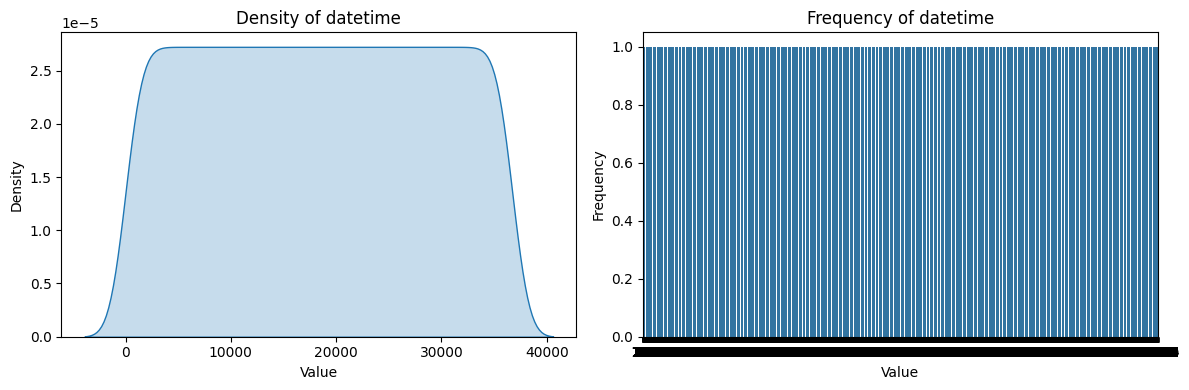



2. week_X-2
count    36720.000000
mean      1172.405388
std        191.916845
min         85.192500
25%       1004.807450
50%       1160.983850
75%       1318.602650
max       1719.043900
Name: week_X-2, dtype: float64

Value Counts:
 week_X-2
1123.6338    2
1081.1354    2
1340.1261    2
1096.4417    2
1273.5351    2
            ..
1368.7826    1
1408.8563    1
1390.3741    1
1383.3535    1
1141.5161    1
Name: count, Length: 36624, dtype: int64




3. week_X-3
count    36720.000000
mean      1171.627655
std        191.649220
min         85.192500
25%       1004.093150
50%       1160.245150
75%       1317.705275
max       1645.477300
Name: week_X-3, dtype: float64

Value Counts:
 week_X-3
973.8241     2
1132.1043    2
908.9713     2
1113.5127    2
1116.3975    2
            ..
1374.6431    1
1367.9047    1
1368.4051    1
1378.8498    1
1149.9883    1
Name: count, Length: 36622, dtype: int64




4. week_X-4
count    36720.000000
mean      1170.818351
std        191.535919
min         85.192500
25%       1003.349825
50%       1158.946650
75%       1316.997800
max       1645.477300
Name: week_X-4, dtype: float64

Value Counts:
 week_X-4
949.4808     2
1083.5059    2
1210.9707    2
895.2589     2
1276.5069    2
            ..
1464.2952    1
1442.9595    1
1353.1731    1
1236.4151    1
1099.2100    1
Name: count, Length: 36623, dtype: int64


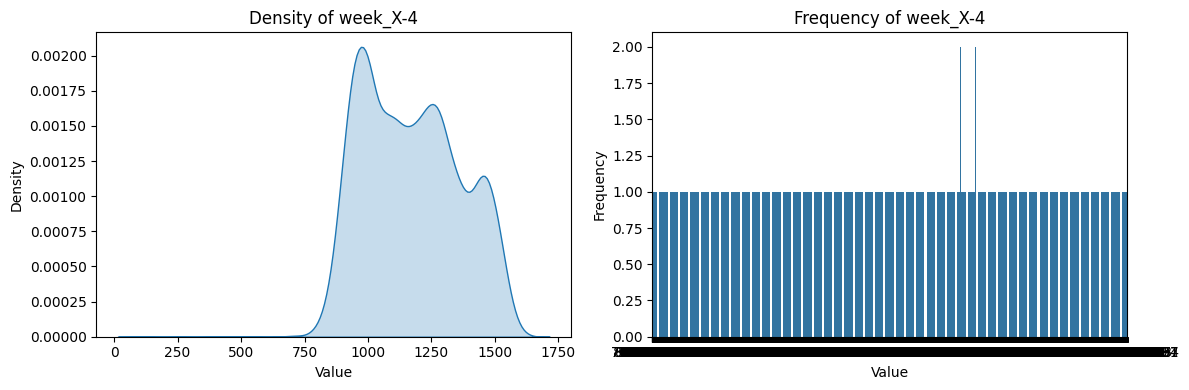



5. MA_X-4
count    36720.000000
mean      1171.860987
std        184.017825
min        793.602650
25%       1005.241544
50%       1166.273912
75%       1310.217306
max       1608.401625
Name: MA_X-4, dtype: float64

Value Counts:
 MA_X-4
1253.687300    2
1239.482225    2
1228.398700    2
1479.836100    2
935.280175     2
              ..
1260.183600    1
1352.817733    1
1437.805400    1
1476.299367    1
1130.238133    1
Name: count, Length: 36699, dtype: int64




6. dayOfWeek
count    36720.000000
mean         3.996187
std          1.999642
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: dayOfWeek, dtype: float64

Value Counts:
 dayOfWeek
2    5256
3    5256
4    5256
1    5255
5    5233
6    5232
7    5232
Name: count, dtype: int64


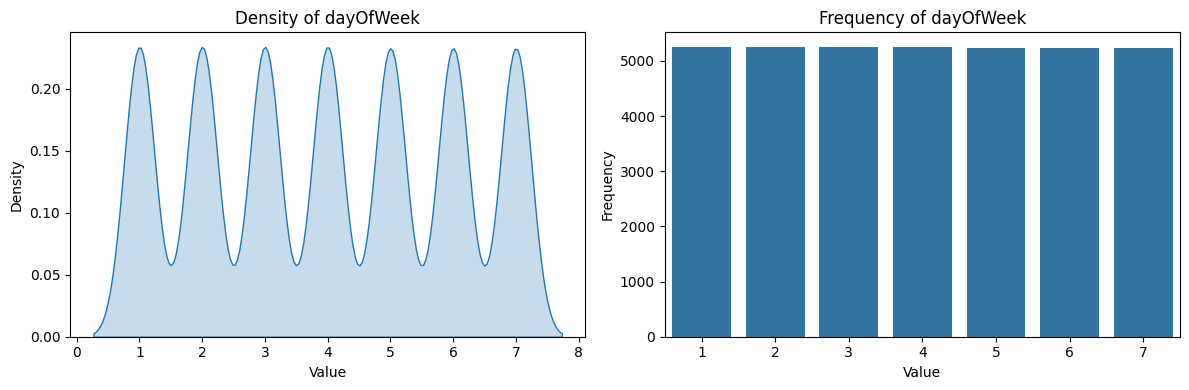



7. weekend
count    36720.000000
mean         0.286247
std          0.452013
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: weekend, dtype: float64

Value Counts:
 weekend
0    26209
1    10511
Name: count, dtype: int64


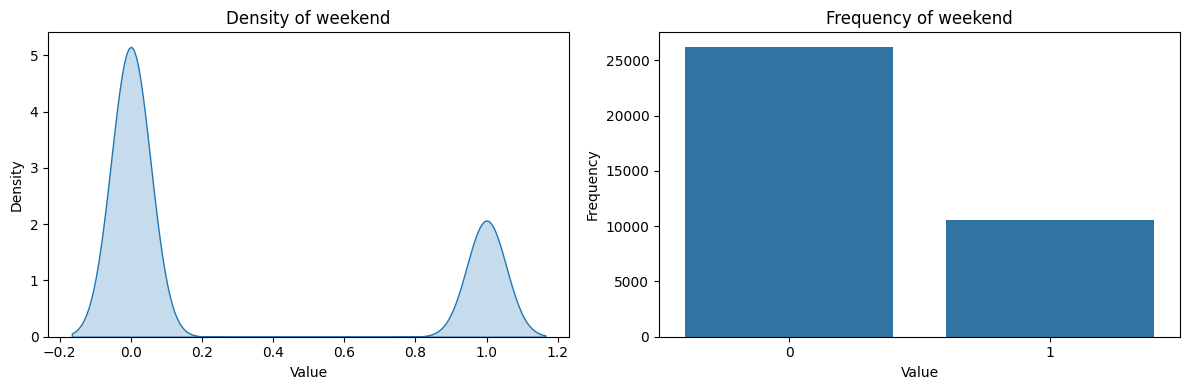



8. holiday
count    36720.000000
mean         0.063399
std          0.243682
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: holiday, dtype: float64

Value Counts:
 holiday
0    34392
1     2328
Name: count, dtype: int64




9. Holiday_ID
count    36720.000000
mean         0.710458
std          3.171065
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: Holiday_ID, dtype: float64

Value Counts:
 Holiday_ID
0     34392
4       120
5       120
6       120
7       120
1       120
21      120
12      120
3       120
16      120
17       96
22       96
20       96
19       96
18       96
13       96
15       96
14       96
11       96
10       96
9        96
8        96
2        96
Name: count, dtype: int64




10. hourOfDay
count    36720.000000
mean        11.500000
std          6.922281
min          0.000000
25%          5.750000
50%         11.500000
75%         17.250000
max         23.000000
Name: hourOfDay, dtype: float64

Value Counts:
 hourOfDay
1     1530
2     1530
23    1530
22    1530
21    1530
20    1530
19    1530
18    1530
17    1530
16    1530
15    1530
14    1530
13    1530
12    1530
11    1530
10    1530
9     1530
8     1530
7     1530
6     1530
5     1530
4     1530
3     1530
0     1530
Name: count, dtype: int64




11. T2M_toc
count    36720.000000
mean        27.350902
std          1.685151
min         22.953455
25%         26.111856
50%         27.072916
75%         28.514787
max         35.039575
Name: T2M_toc, dtype: float64

Value Counts:
 T2M_toc
27.264978    4
26.777246    4
27.281671    4
26.172021    4
26.184656    4
            ..
26.527094    1
25.922876    1
25.897821    1
25.907861    1
27.522791    1
Name: count, Length: 33302, dtype: int64


In [23]:
for j, i in enumerate(x.columns, 1):
    print(f"{j}. {i}\n{'=' * 50}")
    print(x[i].describe())
    print("\nValue Counts:\n", data[i].value_counts())

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create a 1x2 grid

    # Density Plot
    sns.kdeplot(x[i], fill=True, ax=axes[0])
    axes[0].set_title(f'Density of {i}')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')

    # Frequency Plot (Countplot)
    sns.countplot(x=x[i], ax=axes[1])
    axes[1].set_title(f'Frequency of {i}')
    axes[1].set_xlabel('Value')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

    print("\n" + "=" * 127 + "\n")

### Kernel Density Estimation (KDE) Plots

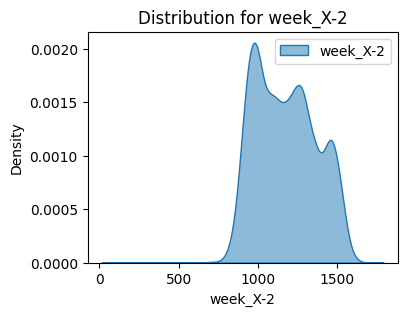

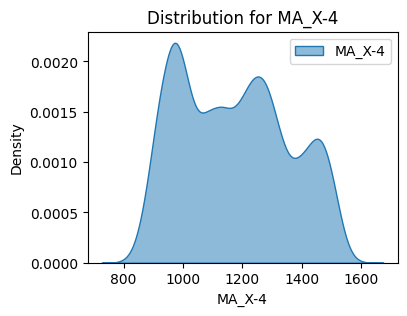

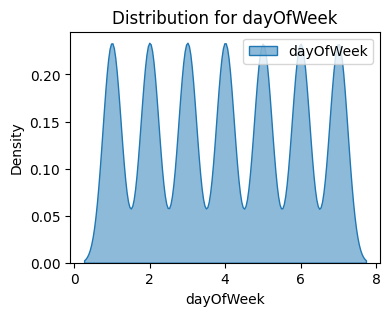

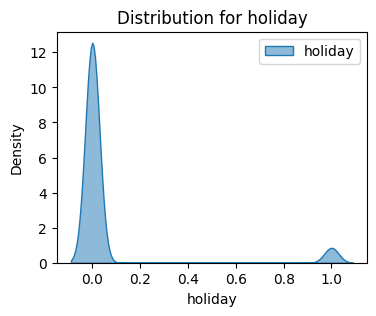

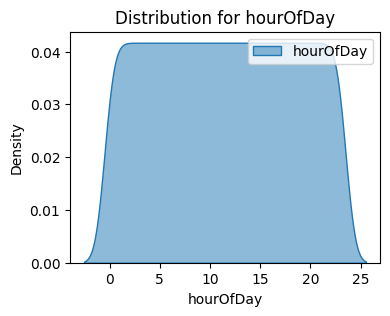

In [22]:
numeric_columns = x.select_dtypes(include=['number']).columns
for col in x.columns:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(x[col], label=col, fill=True, alpha=0.5)
    plt.title(f'Distribution for {col}')
    plt.legend()
    plt.show()

# Splitting the Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Features shape (X_train):",X_train.shape)
print("\nTraining Labels shape (y_train):",y_train.shape)
print("\nTesting Features shape (X_test):",X_test.shape)
print("\nTesting Labels shape (y_test):",y_test.shape)

Training Features shape (X_train): (29376, 11)

Training Labels shape (y_train): (29376,)

Testing Features shape (X_test): (7344, 11)

Testing Labels shape (y_test): (7344,)


# Training

## LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, model.predict(X_train))
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, model.predict(X_train))

print(f"Test MSE: {mse}")
print(f"Train MSE: {train_mse}")
print(f"Test R²: {r2}")
print(f"Train R²: {r2_train}")

Test MSE: 3997.496666838758
Train MSE: 4025.7502565725354
Test R²: 0.891803728099781
Train R²: 0.8907647643636386


### Predicted vs Actual Values Plot

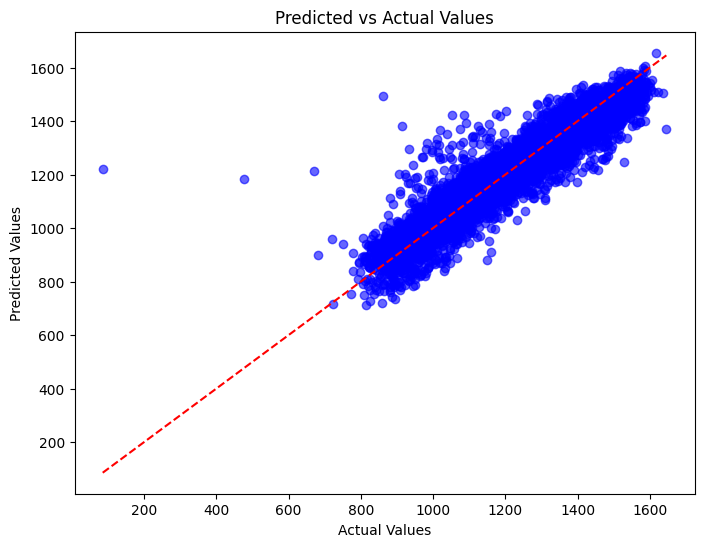

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Residuals Plot

In [28]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### New Section

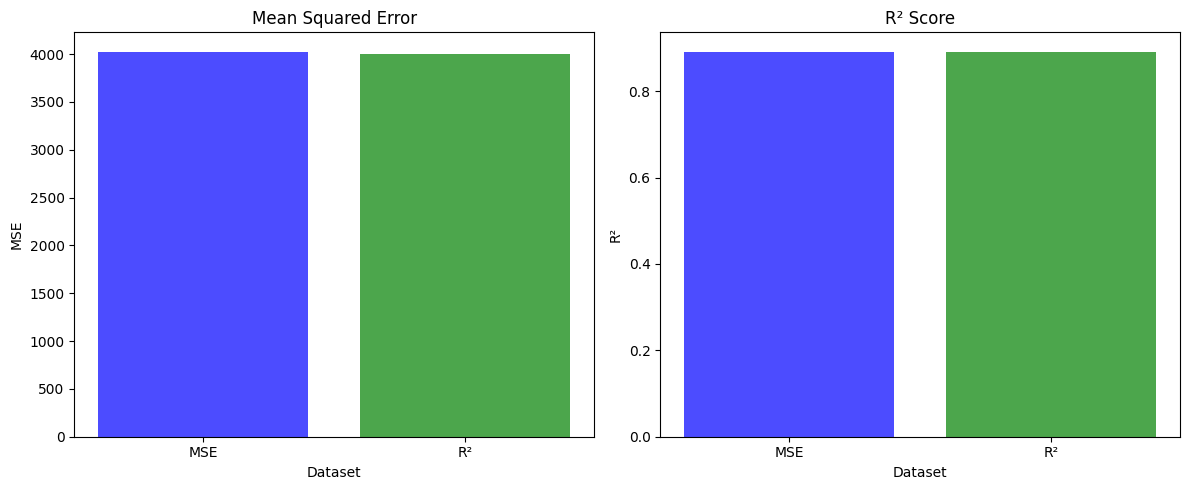

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE and R² for both train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

# Now define your metrics for plotting
metrics = ['MSE', 'R²']
train_metrics = [train_mse, train_r2]  # Train metrics
test_metrics = [mse, r2]  # Test metrics

# Plotting the metrics
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MSE Bar plot
axes[0].bar(metrics, [train_mse, mse], alpha=0.7, color=['blue', 'green'])
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Dataset')

# R² Bar plot
axes[1].bar(metrics, [train_r2, r2], alpha=0.7, color=['blue', 'green'])
axes[1].set_title('R² Score')
axes[1].set_ylabel('R²')
axes[1].set_xlabel('Dataset')

plt.tight_layout()
plt.show()


### confusion_matrix

In [31]:
threshold = np.median(y_test)
y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Low', 'Predicted High'],
            yticklabels=['Actual Low', 'Actual High'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Lasso Svm

In [32]:
from sklearn.linear_model import Lasso
from sklearn.svm import SVR

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, lasso_model.predict(X_train))
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lasso_model.predict(X_train))

print(f"Test MSE: {mse}")
print(f"Train MSE: {train_mse}")
print(f"Test R²: {r2}")
print(f"Train R²: {r2_train}")

Test MSE: 3999.3659186583673
Train MSE: 4026.7464771754994
Test R²: 0.8917531349173521
Train R²: 0.8907377327830946


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.045e+06, tolerance: 1.083e+05
  model = cd_fast.enet_coordinate_descent(


### Predicted vs Actual Values Plot

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values (Lasso Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Residuals Plot

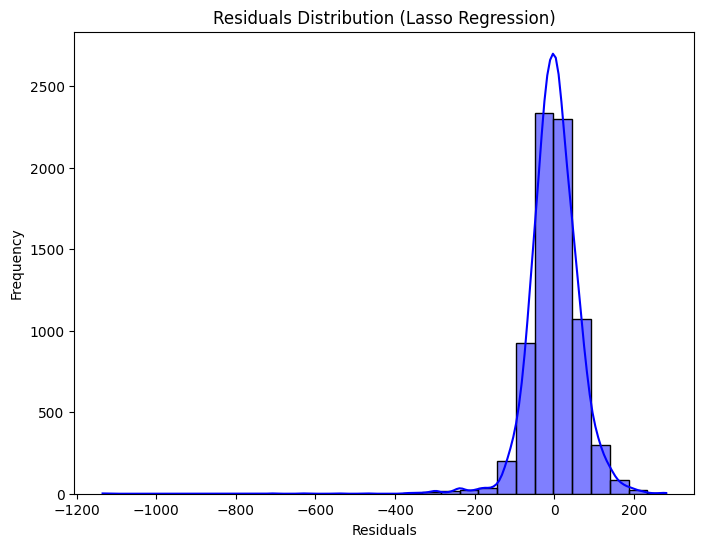

In [34]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution (Lasso Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### New Section

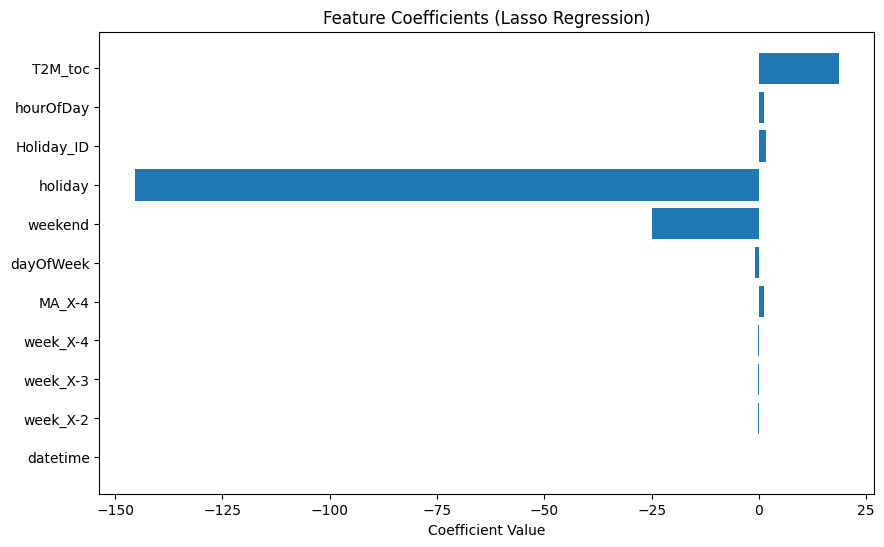

In [35]:
coefficients = lasso_model.coef_
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, coefficients, align='center')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients (Lasso Regression)')
plt.show()

## Perceptron

In [36]:
from sklearn.linear_model import Perceptron
y_train_discrete = pd.qcut(y_train, q=3, labels=[0, 1, 2])

perceptron = Perceptron()
perceptron.fit(X_train, y_train_discrete)

y_test_discrete = pd.qcut(y_test, q=3, labels=[0, 1, 2])
y_pred_perceptron = perceptron.predict(X_test)

In [37]:
print(f"Accuracy (Perceptron): {accuracy_score(y_test_discrete, y_pred_perceptron)}")

Accuracy (Perceptron): 0.33401416122004357


### confusion_matrix

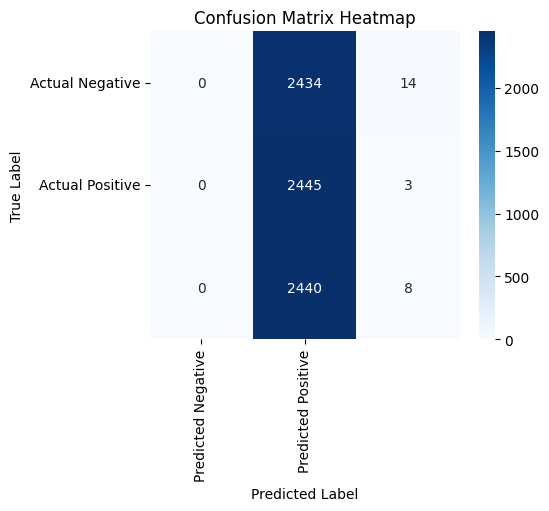

In [38]:
conf_matrix_perceptron = confusion_matrix(y_test_discrete, y_pred_perceptron)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_perceptron, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Ridge

In [39]:
#Ridge
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, ridge_model.predict(X_train))
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, ridge_model.predict(X_train))

In [40]:
print(f"Test MSE: {mse}")
print(f"Train MSE: {train_mse}")
print(f"Test R²: {r2}")
print(f"Train R²: {r2_train}")

Test MSE: 3997.495532248794
Train MSE: 4025.7502748222987
Test R²: 0.8918037588086006
Train R²: 0.8907647638684472


### Predicted vs Actual Values

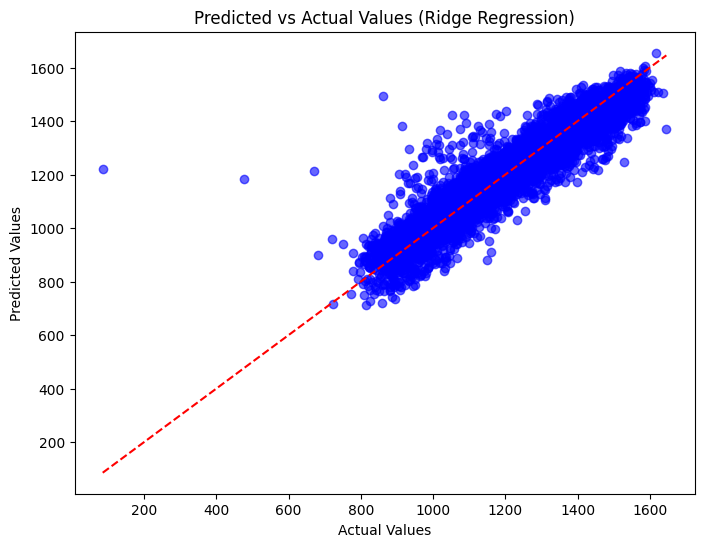

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Residuals Distribution

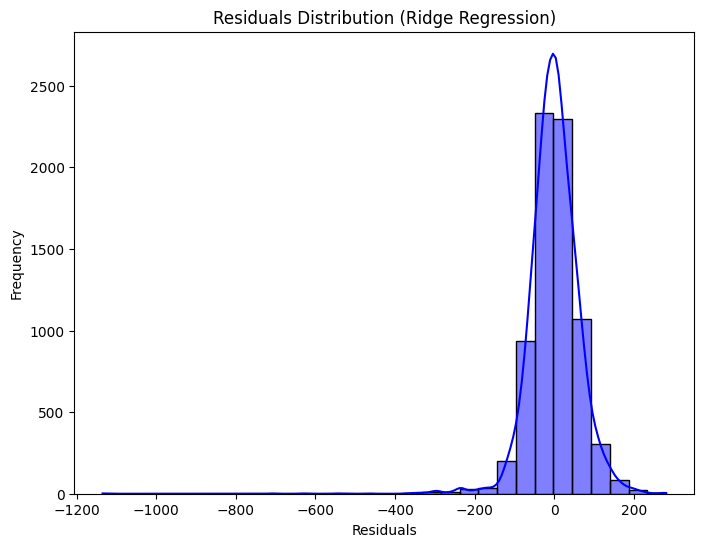

In [42]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution (Ridge Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### MSE and R² Score Comparison

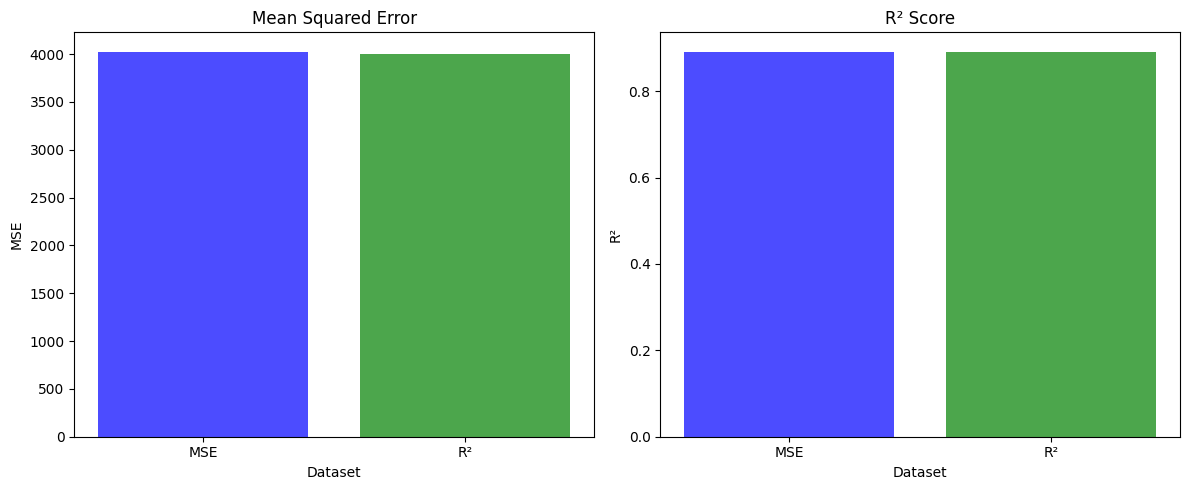

In [48]:
# Calculate MSE and R² for both train and test sets
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

mse = mean_squared_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

# Prepare data for plotting
metrics = ['MSE', 'R²']
train_metrics = [train_mse, train_r2]
test_metrics = [mse, r2]

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MSE Bar plot
axes[0].bar(metrics, [train_mse, mse], alpha=0.7, color=['blue', 'green'])
axes[0].set_title('Mean Squared Error')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Dataset')

# R² Bar plot
axes[1].bar(metrics, [train_r2, r2], alpha=0.7, color=['blue', 'green'])
axes[1].set_title('R² Score')
axes[1].set_ylabel('R²')
axes[1].set_xlabel('Dataset')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


## Root mean square error

In [44]:
#Root mean square error
import math
rmse = math.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 63.225750547137


##Linear  

## Support Vector Machine (SVM)

In [45]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)
# Predictions
train_pred_svm = svm_reg.predict(X_train)
test_pred_svm = svm_reg.predict(X_test)

# Evaluation
train_mse_svm = mean_squared_error(y_train, train_pred_svm)
test_mse_svm = mean_squared_error(y_test, test_pred_svm)
train_r2_svm = r2_score(y_train, train_pred_svm)
test_r2_svm = r2_score(y_test, test_pred_svm)


# Display Results
print("\nSupport Vector Machine (SVM):")
print(f"Train MSE: {train_mse_svm}, Test MSE: {test_mse_svm}")
print(f"Train R²: {train_r2_svm}, Test R²: {test_r2_svm}")


Support Vector Machine (SVM):
Train MSE: 32776.04789006758, Test MSE: 32871.120712881035
Train R²: 0.11065041636526884, Test R²: 0.11031002381589916


### Predicted vs Actual Values

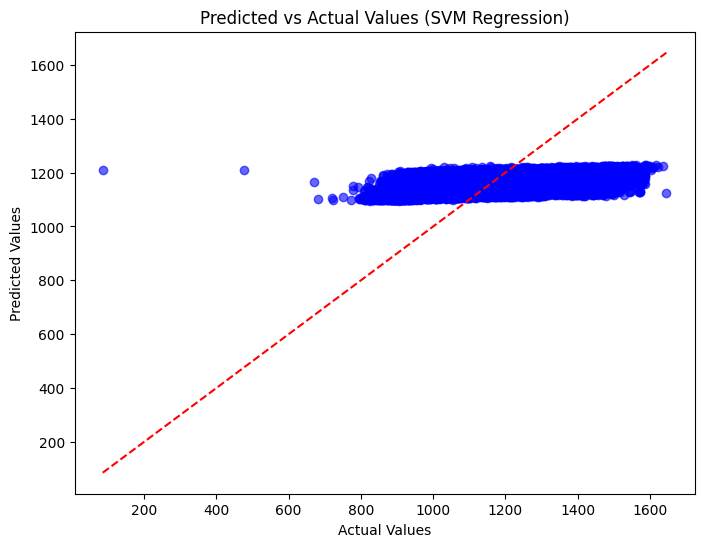

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred_svm, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values (SVM Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Residuals Distribution

In [50]:
residuals_svm = y_test - test_pred_svm
plt.figure(figsize=(8, 6))
sns.histplot(residuals_svm, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution (SVM Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### MSE and R² Score Comparison

In [51]:
metrics = ['MSE', 'R²']
train_metrics_svm = [train_mse_svm, train_r2_svm]
test_metrics_svm = [test_mse_svm, test_r2_svm]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MSE Bar plot
axes[0].bar(metrics, [train_mse_svm, test_mse_svm], alpha=0.7, color=['blue', 'green'])
axes[0].set_title('Mean Squared Error (SVM)')
axes[0].set_ylabel('MSE')
axes[0].set_xlabel('Dataset')

# R² Bar plot
axes[1].bar(metrics, [train_r2_svm, test_r2_svm], alpha=0.7, color=['blue', 'green'])
axes[1].set_title('R² Score (SVM)')
axes[1].set_ylabel('R²')
axes[1].set_xlabel('Dataset')

plt.tight_layout()
plt.show()

## KNN

In [52]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
# Predictions
train_pred_knn = knn_reg.predict(X_train)
test_pred_knn = knn_reg.predict(X_test)
y_pred_knn = knn_reg.predict(X_test)
# Evaluation
train_mse_knn = mean_squared_error(y_train, train_pred_knn)
test_mse_knn = mean_squared_error(y_test, test_pred_knn)
train_r2_knn = r2_score(y_train, train_pred_knn)
test_r2_knn = r2_score(y_test, test_pred_knn)


# Display Results
print("\nk-Nearest Neighbors (k-NN):")
print(f"Train MSE: {train_mse_knn}, Test MSE: {test_mse_knn}")
print(f"Train R²: {train_r2_knn}, Test R²: {test_r2_knn}")


k-Nearest Neighbors (k-NN):
Train MSE: 1173.3269183895202, Test MSE: 2016.5030013106261
Train R²: 0.9681627934570671, Test R²: 0.9454213160883137


In [53]:
print(f"prediction of knn: {train_pred_knn}")
print(f"prediction of knn: {test_pred_knn}")

prediction of knn: [1171.54986  943.56366  907.30054 ...  973.6427  1070.34162  913.5117 ]
prediction of knn: [ 992.8504   743.27604 1270.46094 ... 1402.53146 1367.5361  1288.82578]


### Scatter Plot of Predictions vs Actual Values

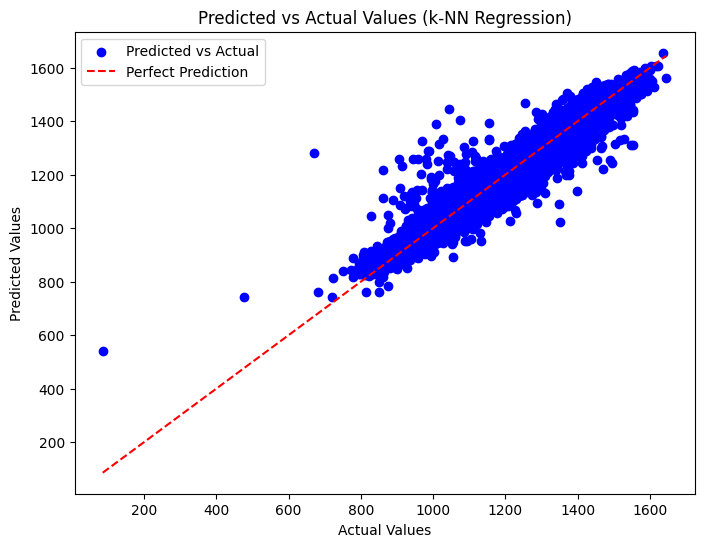

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (k-NN Regression)')
plt.legend()
plt.show()

### Residual Plot

In [55]:
residuals = y_test - test_pred_knn

plt.figure(figsize=(8, 6))
sns.residplot(x=test_pred_knn, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (k-NN Regression)')
plt.show()

### Learning Curves

In [61]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(knn_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and standard deviation of training and test scores
train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Error', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Error', color='green')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title('Learning Curves (k-NN)')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()


### k-Nearest Neighbors Distance Visualization

In [62]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Fit k-NN on the reduced data
knn_reg.fit(X_pca, y_train)

# Plot the data points and their nearest neighbors
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('k-NN - Data Points with Nearest Neighbors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Variable')
plt.show()


### k-NN Error Distribution

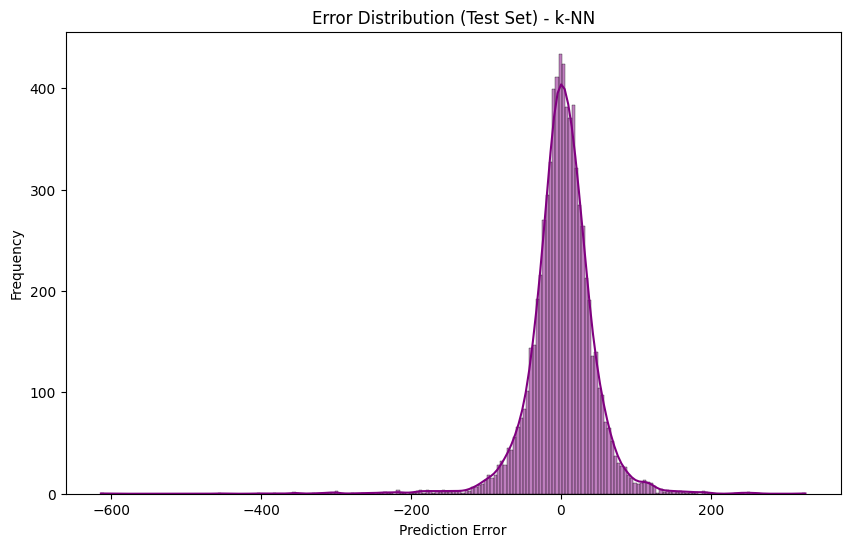

In [63]:
# Error distribution plot for Test Set
errors = y_test - test_pred_knn
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='purple')
plt.title('Error Distribution (Test Set) - k-NN')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


### Hyperparameter Tuning (Effect of k on Performance)

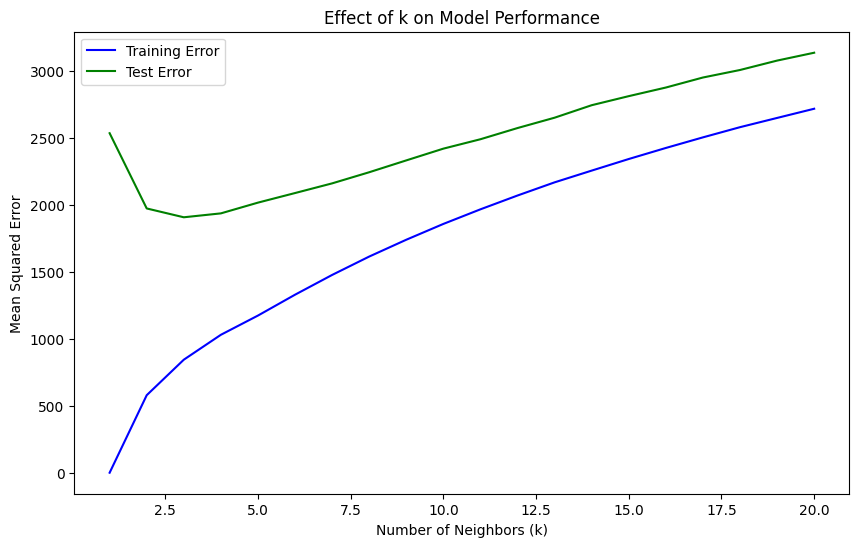

In [64]:
# Tune the hyperparameter k (number of neighbors)
k_values = range(1, 21)
train_errors = []
test_errors = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train, y_train)
    train_pred_knn = knn_reg.predict(X_train)
    test_pred_knn = knn_reg.predict(X_test)

    # Calculate MSE
    train_errors.append(mean_squared_error(y_train, train_pred_knn))
    test_errors.append(mean_squared_error(y_test, test_pred_knn))

# Plot the error as a function of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Training Error', color='blue')
plt.plot(k_values, test_errors, label='Test Error', color='green')
plt.title('Effect of k on Model Performance')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


### Model Comparison (k-NN vs Other Models)

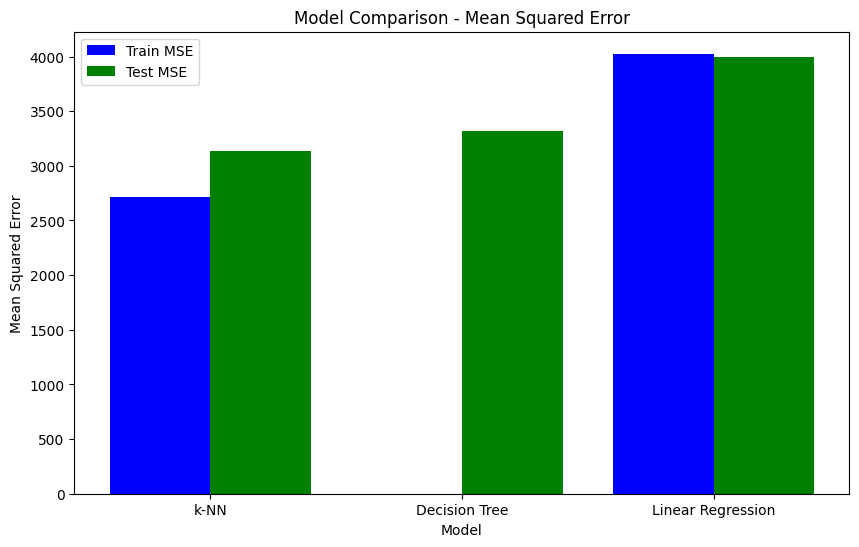

In [72]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

test_pred_tree = tree_reg.predict(X_test)
test_pred_lr = lr_reg.predict(X_test)

train_pred_tree = tree_reg.predict(X_train)
train_pred_lr = lr_reg.predict(X_train)

test_mse_knn = mean_squared_error(y_test, test_pred_knn)


test_mse_tree = mean_squared_error(y_test, test_pred_tree)
test_mse_lr = mean_squared_error(y_test, test_pred_lr)

train_mse_knn = mean_squared_error(y_train, train_pred_knn)
train_mse_tree = mean_squared_error(y_train, train_pred_tree)
train_mse_lr = mean_squared_error(y_train, train_pred_lr)

models = ['k-NN', 'Decision Tree', 'Linear Regression']
test_mse_comparison = [test_mse_knn, test_mse_tree, test_mse_lr]
train_mse_comparison = [train_mse_knn, train_mse_tree, train_mse_lr]

# Plot the comparison of MSE
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
plt.bar(x - 0.2, train_mse_comparison, 0.4, label='Train MSE', color='blue')
plt.bar(x + 0.2, test_mse_comparison, 0.4, label='Test MSE', color='green')
plt.xticks(x, models)
plt.title('Model Comparison - Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

### Cross-Validation Results

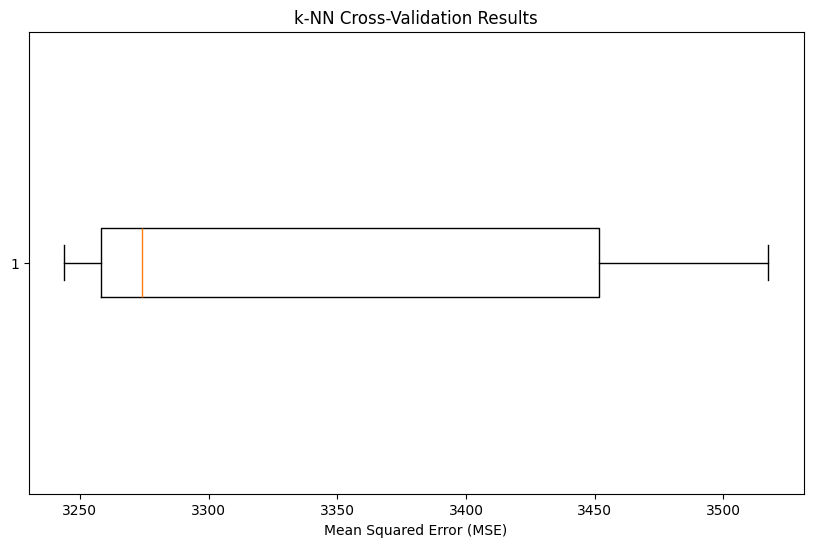

In [66]:
from sklearn.model_selection import cross_val_score

# Cross-validation for k-NN
cv_scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Box plot for cross-validation scores
plt.figure(figsize=(10, 6))
plt.boxplot(-cv_scores, vert=False)
plt.title('k-NN Cross-Validation Results')
plt.xlabel('Mean Squared Error (MSE)')
plt.show()


## DT

In [57]:
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Importing the missing metric

# Train the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate metrics for the test set
mse = mean_squared_error(y_test, y_pred_tree)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)
mae = mean_absolute_error(y_test, y_pred_tree)

# Calculate metrics for the training set
train_pred_tree = tree_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred_tree)
train_r2 = r2_score(y_train, train_pred_tree)

# Print the results
print("\nDecision Tree Regressor:")
print(f"Test MSE: {mse}")
print(f"Train MSE: {train_mse}")
print(f"Test R²: {r2}")
print(f"Train R²: {train_r2}")  # Corrected this line to use train_r2

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")



Decision Tree Regressor:
Test MSE: 3516.8067195349267
Train MSE: 0.0
Test R²: 0.9048140854740915
Train R²: 1.0
Test RMSE: 59.30267042498952
Test MAE: 42.40451485669961


### Actual vs Predicted Values Plot

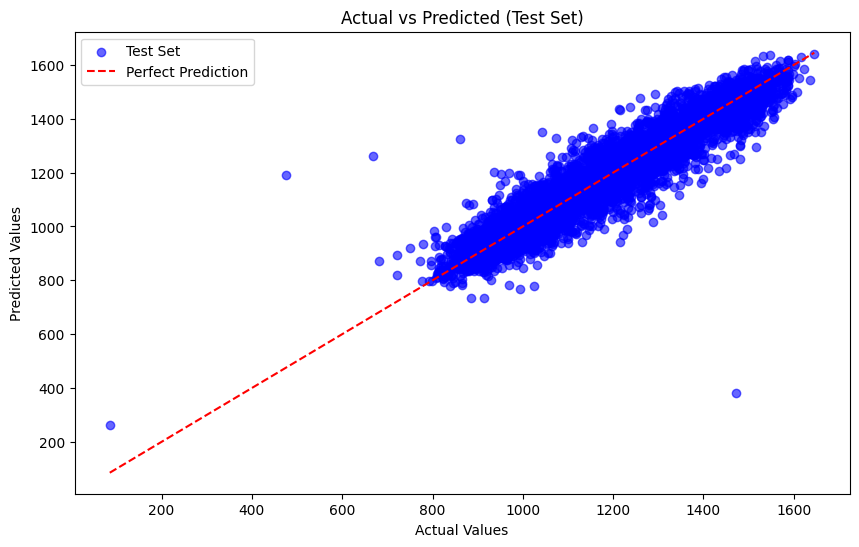

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='blue', alpha=0.6, label='Test Set')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

### Residual Plot

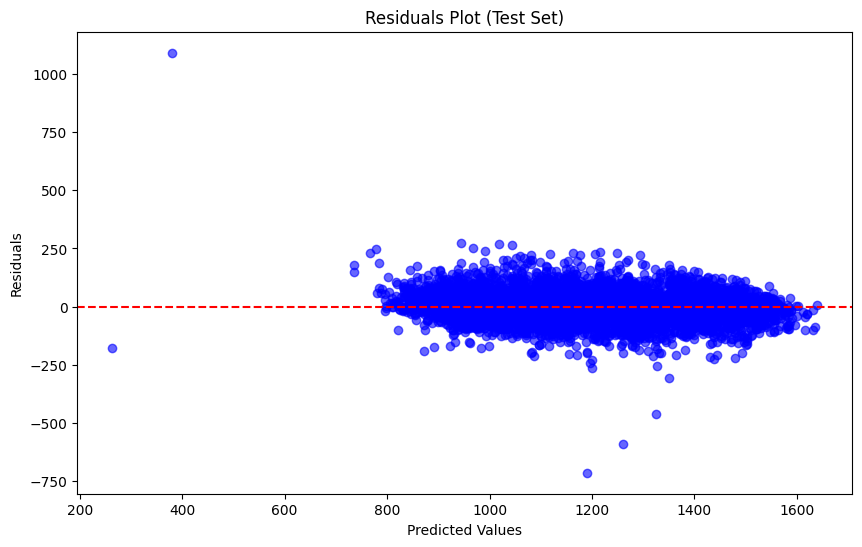

In [59]:
residuals = y_test - y_pred_tree
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_tree, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Plot (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Feature Importance Plot

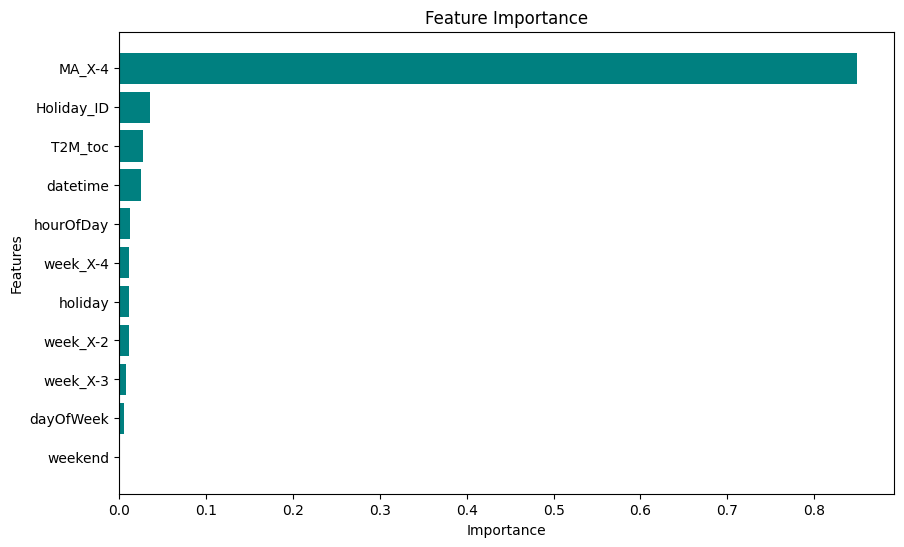

In [60]:
feature_importances = tree_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], feature_importances[sorted_idx], color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## ANN

In [73]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Artificial Neural Network
ann_model = Sequential()

# Input Layer and First Hidden Layer
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Second Hidden Layer
ann_model.add(Dense(units=32, activation='relu'))

# Output Layer
ann_model.add(Dense(units=1))  # For regression, no activation in the output layer

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Predictions
y_pred_ann = ann_model.predict(X_test_scaled)

# Model Evaluation (Mean Squared Error, Root Mean Squared Error, R2, and MAE)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = math.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)

print(f"ANN Mean Squared Error: {mse_ann}")
print(f"ANN Root Mean Squared Error: {rmse_ann}")
print(f"ANN R-squared: {r2_ann}")
print(f"ANN Mean Absolute Error: {mae_ann}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 935223.2500
Epoch 2/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 35845.5000
Epoch 3/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 7623.6377
Epoch 4/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 4787.0654
Epoch 5/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3883.1907
Epoch 6/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3494.9412
Epoch 7/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3450.9268
Epoch 8/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 3377.6614
Epoch 9/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 3143.0730
Epoch 10/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3129.0930
Epoch 11/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3254.5583
Epoch 12/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3054.1116
Epoch 13/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3154.9316
Epoch 14/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3155.4241
Epoch 15/1

### Predicted vs Actual Values

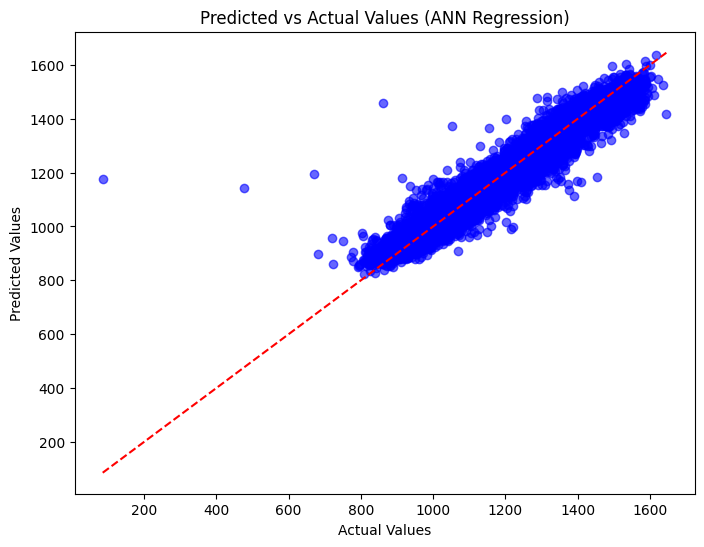

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ann, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Values (ANN Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Residuals Distribution

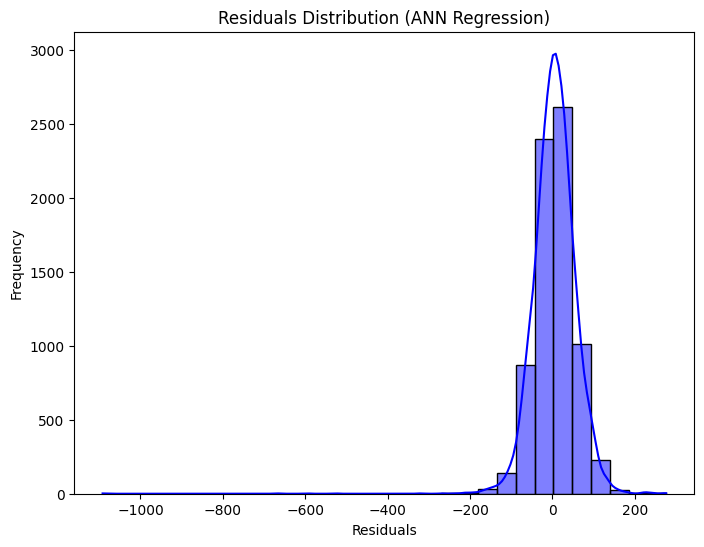

In [75]:
residuals_ann = y_test - y_pred_ann.flatten() # Flatten y_pred_ann to 1D
plt.figure(figsize=(8, 6))
sns.histplot(residuals_ann, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution (ANN Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Model Loss Curve

In [76]:
history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1) # modified line

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], color='blue')
plt.title('Model Loss Curve (ANN Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Epoch 1/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2807.5854
Epoch 2/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2632.9563
Epoch 3/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2547.0964
Epoch 4/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2558.8330
Epoch 5/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2586.8997
Epoch 6/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2595.5645
Epoch 7/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2719.8286
Epoch 8/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2605.5930
Epoch 9/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2612.2222
Epoch 10/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2685.9216
Epoch 11/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2568.3750
Epoch 12/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2554.5132
Epoch 13/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 2633.9221
Epoch 14/100
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2649.7864
E

##

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample Dataset
data = np.random.randn(100)  # Example dataset with 100 random numbers

# Bootstrap Function
def bootstrap(data, n_iterations, statistic_fn):
    n = len(data)
    bootstrap_stats = []
    for i in range(n_iterations):
        # Resample with replacement
        sample = np.random.choice(data, size=n, replace=True)
        # Calculate the statistic
        stat = statistic_fn(sample)
        bootstrap_stats.append(stat)
    return np.array(bootstrap_stats)

# Apply Bootstrapping
n_iterations = 1000
bootstrap_means = bootstrap(data, n_iterations, np.mean)

# Plot Results
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=30, color='skyblue', edgecolor='black')
plt.title('Bootstrap Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.axvline(x=np.mean(data), color='red', linestyle='--', label='Original Mean')
plt.legend()
plt.show()

# Summary Statistics
print(f"Original Mean: {np.mean(data):.3f}")
print(f"Bootstrap Mean: {np.mean(bootstrap_means):.3f}")
print(f"Bootstrap Std Dev: {np.std(bootstrap_means):.3f}")


Original Mean: 0.010
Bootstrap Mean: 0.014
Bootstrap Std Dev: 0.103
